<a href="https://colab.research.google.com/github/syahrinb/CM-Haralick-Random-Forest/blob/main/Color_Momment_Haralick_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mahotas==1.4.10

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.7 MB 5.6 MB/s 


# **Setup**

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats.stats as stats
import os
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import math
import statistics
import mahotas as mt
import pandas as pd
from glob import glob
import numpy as np
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
from sklearn import tree

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
meanH = []
meanS = []
meanV = []

standevH = []
standevS = []
standevV = []

medianH = []
medianS = []
medianV = []

skewH = []
skewS = []
skewV = []

N = []

def reset_var():
  meanH.clear()
  meanS.clear()
  meanV.clear()

  standevH.clear()
  standevS.clear()
  standevV.clear()

  medianH.clear()
  medianS.clear()
  medianV.clear()

  skewH.clear()
  skewS.clear()
  skewV.clear()

  N.clear()

  dir = ""
  jml = []

# **Color Moment**

In [ ]:
#Early Blight
reset_var()
filename = []
label_cm = []

dir = '/content/drive/My Drive/Dataset Kentang/Early Blight/'
jml = (len([name for name in os.listdir(dir) if os.path.isfile(os.path.join(dir, name))]))


for data in range (jml):
    filename.append('Early Blight '+str(data+1)+'.jpg')
    label_cm.append('Early Blight')
    cek = plt.imread(dir+filename[data])
    hsv = colors.rgb_to_hsv(cek/255)
    img = np.asarray(hsv)
    img = img.astype('float')

    differenceH = 0.0
    differenceS = 0.0
    differenceV = 0.0

    H = img[:, :, 0]
    S = img[:, :, 1]
    V = img[:, :, 2]

    meanH.append(np.mean(H))
    meanS.append(np.mean(S))
    meanV.append(np.mean(V))
    standevH.append(np.std(H))
    standevS.append(np.std(S))
    standevV.append(np.std(V))

    medianH.append(np.median(H))
    medianS.append(np.median(S))
    medianV.append(np.median(V))

#perhitungan skewness
    for i in range(len(img)):
        for j in range(len(img[0])):
            differenceH = differenceH + np.float_power((H[i][j] - meanH[data]), 3)
            differenceS = differenceS + np.float_power((S[i][j] - meanS[data]), 3)
            differenceV = differenceV + np.float_power((V[i][j] - meanV[data]), 3)

        tempN = len(img) * len(img[0])

        difH = differenceH/tempN
        difS = differenceS/tempN
        difV = differenceV/tempN

    tempskewH = difH/np.float_power((standevH[data]), 3)
    tempskewS = difS/np.float_power((standevS[data]), 3)
    tempskewV = difV/np.float_power((standevV[data]), 3)

    skewH.append(tempskewH)
    skewS.append(tempskewS)
    skewV.append(tempskewV)

In [ ]:
df_cm_early_blight = pd.DataFrame({'filename':filename, 
            'meanH': meanH,
            'meanS' : meanS,
            'meanV': meanV, 
            'standevH': standevH, 
            'standevS': standevS, 
            'standevV': standevV,
            'skewH': skewH,
            'skewS': skewS,
            'skewV': skewV,
            'Class': label_cm})

In [ ]:
#Healty
reset_var()
filename = []
label_cm = []

dir = '/content/drive/My Drive/Dataset Kentang/Healty/'
jml = (len([name for name in os.listdir(dir) if os.path.isfile(os.path.join(dir, name))]))


for data in range (jml):
    filename.append('Healty '+str(data+1)+'.jpg')
    label_cm.append('Healty')
    cek = plt.imread(dir+filename[data])
    hsv = colors.rgb_to_hsv(cek/255)
    img = np.asarray(hsv)
    img = img.astype('float')

    differenceH = 0.0
    differenceS = 0.0
    differenceV = 0.0

    H = img[:, :, 0]
    S = img[:, :, 1]
    V = img[:, :, 2]

    meanH.append(np.mean(H))
    meanS.append(np.mean(S))
    meanV.append(np.mean(V))
    standevH.append(np.std(H))
    standevS.append(np.std(S))
    standevV.append(np.std(V))

    medianH.append(np.median(H))
    medianS.append(np.median(S))
    medianV.append(np.median(V))

#Perhitungan Skewness
    for i in range(len(img)):
        for j in range(len(img[0])):
            differenceH = differenceH + np.float_power((H[i][j] - meanH[data]), 3)
            differenceS = differenceS + np.float_power((S[i][j] - meanS[data]), 3)
            differenceV = differenceV + np.float_power((V[i][j] - meanV[data]), 3)

        tempN = len(img) * len(img[0])

        difH = differenceH/tempN
        difS = differenceS/tempN
        difV = differenceV/tempN

    tempskewH = difH/np.float_power((standevH[data]), 3)
    tempskewS = difS/np.float_power((standevS[data]), 3)
    tempskewV = difV/np.float_power((standevV[data]), 3)

    skewH.append(tempskewH)
    skewS.append(tempskewS)
    skewV.append(tempskewV)

In [ ]:
df_cm_healty = pd.DataFrame({'filename':filename, 
            'meanH': meanH,
            'meanS' : meanS,
            'meanV': meanV, 
            'standevH': standevH, 
            'standevS': standevS, 
            'standevV': standevV,
            'skewH': skewH,
            'skewS': skewS,
            'skewV': skewV,
            'Class': label_cm})

In [ ]:
#Late Blight
reset_var()
filename = []
label_cm = []
dir = '/content/drive/My Drive/Dataset Kentang/Late Blight/'
jml = (len([name for name in os.listdir(dir) if os.path.isfile(os.path.join(dir, name))]))


for data in range (jml):
    filename.append('Late Blight '+str(data+1)+'.jpg')
    label_cm.append('Late Blight')
    cek = plt.imread(dir+filename[data])
    hsv = colors.rgb_to_hsv(cek/255)
    img = np.asarray(hsv)
    img = img.astype('float')

    differenceH = 0.0
    differenceS = 0.0
    differenceV = 0.0

    H = img[:, :, 0]
    S = img[:, :, 1]
    V = img[:, :, 2]

    meanH.append(np.mean(H))
    meanS.append(np.mean(S))
    meanV.append(np.mean(V))
    standevH.append(np.std(H))
    standevS.append(np.std(S))
    standevV.append(np.std(V))

    medianH.append(np.median(H))
    medianS.append(np.median(S))
    medianV.append(np.median(V))

#Perhitungan Skewness
    for i in range(len(img)):
        for j in range(len(img[0])):
            differenceH = differenceH + np.float_power((H[i][j] - meanH[data]), 3)
            differenceS = differenceS + np.float_power((S[i][j] - meanS[data]), 3)
            differenceV = differenceV + np.float_power((V[i][j] - meanV[data]), 3)

        tempN = len(img) * len(img[0])

        difH = differenceH/tempN
        difS = differenceS/tempN
        difV = differenceV/tempN

    tempskewH = difH/np.float_power((standevH[data]), 3)
    tempskewS = difS/np.float_power((standevS[data]), 3)
    tempskewV = difV/np.float_power((standevV[data]), 3)

    skewH.append(tempskewH)
    skewS.append(tempskewS)
    skewV.append(tempskewV)

In [ ]:
df_cm_late_blight = pd.DataFrame({'filename':filename, 
            'meanH': meanH,
            'meanS' : meanS,
            'meanV': meanV, 
            'standevH': standevH, 
            'standevS': standevS, 
            'standevV': standevV,
            'skewH': skewH,
            'skewS': skewS,
            'skewV': skewV,
            'Class': label_cm})

In [ ]:
frames = [ df_cm_early_blight, df_cm_healty, df_cm_late_blight]
  
df_colormoment = pd.concat(frames)
#df_colormoment.to_csv('/content/drive/My Drive/Dataset Kentang/Hasil Ekstraksi CM.csv', index=False)

In [ ]:
df_cm=df_colormoment.sort_values(by='filename', inplace=False, ascending=True).reset_index(drop=True)

In [ ]:
df_cm

,filename,meanH,meanS,meanV,standevH,standevS,standevV,skewH,skewS,skewV,Class
0,Early Blight 1.jpg,0.124907,0.186109,0.762881,0.125493,0.201635,0.237547,1.241079,1.011036,-0.474473,Early Blight
1,Early Blight 10.jpg,0.143382,0.156058,0.770192,0.137936,0.165444,0.225890,0.641307,0.797017,-0.241074,Early Blight
2,Early Blight 100.jpg,0.079273,0.250145,0.749697,0.103520,0.262235,0.257489,3.716063,0.596110,-0.475055,Early Blight
3,Early Blight 11.jpg,0.121568,0.207354,0.734056,0.118986,0.200058,0.240373,1.499858,0.670917,-0.209068,Early Blight
4,Early Blight 12.jpg,0.126225,0.245623,0.762638,0.126012,0.235045,0.226096,1.363834,0.466607,-0.460360,Early Blight
...,...,...,...,...,...,...,...,...,...,...,...
295,Late Blight 95.jpg,0.104792,0.213915,0.774951,0.130000,0.259579,0.269781,1.459488,0.594221,-0.527896,Late Blight
296,Late Blight 96.jpg,0.107584,0.141568,0.742055,0.146092,0.192970,0.308259,1.694576,1.215608,-0.472215,Late Blight
297,Late Blight 97.jpg,0.111050,0.152935,0.796997,0.139488,0.201384,0.240133,1.242020,1.006402,-0.456922,Late Blight
298,Late Blight 98.jpg,0.112550,0.164159,0.740831,0.137033,0.221176,0.301248,1.100382,1.234246,-0.437505,Late Blight


# **Haralick**

In [ ]:
dir = '/content/drive/My Drive/Dataset Kentang/Grayscale/*/*'

def features_for(imname):
    image = mt.imread(imname)
    arr_feature = mt.features.haralick(image, compute_14th_feature=True).mean(0)
    label = os.path.basename(os.path.dirname(imname))
    filename = os.path.basename(imname)
    return np.append(arr_feature, [label, filename])

textures = map(features_for, sorted(glob(dir, recursive = True), key=len))

haralick_labels = ['Angular Second Moment',
                    'Contrast',
                    'Correlation',
                    'Sum of Squares: Variance',
                    'Inverse Difference Moment',
                    'Sum Average',
                    'Sum Variance',
                    'Sum Entropy',
                    'Entropy',
                    'Difference Variance',
                    'Difference Entropy',
                    'Information Measure of Correlation 1',
                    'Information Measure of Correlation 2',
                    'Maximal Correlation Coefficient',
                    'Label',
                    'File Name']

df_haralick = []
df_haralick = pd.DataFrame(textures)
df_haralick.columns = haralick_labels

In [ ]:
df_haralick2=df_haralick.sort_values(by='File Name', inplace=False, ascending=True).reset_index(drop=True)
#df_haralick2.to_csv('/content/drive/My Drive/Dataset Kentang/Hasil Ekstraksi Haralick2.csv', index=False)

In [ ]:
df_haralick2

,Angular Second Moment,Contrast,Correlation,Sum of Squares: Variance,Inverse Difference Moment,Sum Average,Sum Variance,Sum Entropy,Entropy,Difference Variance,Difference Entropy,Information Measure of Correlation 1,Information Measure of Correlation 2,Maximal Correlation Coefficient,Label,File Name
0,0.15659679452557979,270.603912689269,0.970683541324715,4615.357260401688,0.45825195463271406,370.5432797917995,18190.825128917582,5.927897255243117,8.861091160806176,0.0007114197441349214,4.0563524777803694,-0.32547973383657586,0.9836119820971166,6.318845048478293,Early Blight,Early Blight 1.jpg
1,0.16916818933442923,301.84846785830143,0.9637021718567954,4158.054045767716,0.4687499639744615,376.43106027896783,16330.367715212597,5.644277319130962,8.585674365743309,0.0007502461638599153,4.0603333745860635,-0.2973606222137967,0.974399091705795,6.440061374107744,Early Blight,Early Blight 10.jpg
2,0.16157471191581885,346.73030621395003,0.9709212707390064,5961.998230119742,0.45484897299598837,353.0637360972845,23501.26261426506,6.008996668770443,9.022688140583373,0.0007111907617105625,4.176452262322276,-0.3183590414647247,0.9831872335495444,6.859784748653079,Early Blight,Early Blight 100.jpg
3,0.12265457393488274,326.12698702102523,0.9655106112221972,4728.499190722212,0.4204500117268979,353.17991933349,18587.86977586785,6.111787735329546,9.286620395698641,0.0005873541499760856,4.280625159750626,-0.29591466184065424,0.9795283816437946,6.227752950934232,Early Blight,Early Blight 11.jpg
4,0.12474551550787408,272.0993988601918,0.9705487353185007,4619.866728723003,0.42426334390919773,360.4944859583972,18207.367516031853,6.302490638753158,9.41869312724865,0.0006003343054459487,4.203026913504157,-0.3245226640352506,0.9866342945075459,6.109219658457538,Early Blight,Early Blight 12.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.27456730815159575,155.59153611257153,0.9873577186140695,6152.850916841271,0.5812495924265431,376.6411546105003,24455.81213125254,4.804870656787107,6.946441934341771,0.0011759237730017342,3.2584096242492055,-0.37624796718298004,0.979515107096409,5.933336215660082,Late Blight,Late Blight 95.jpg
296,0.286351393315987,182.49075884684373,0.9872409844211791,7150.5804132776375,0.5850673738481343,366.99327539214704,28419.83089426371,4.6395105420589235,6.799230462069916,0.0012054917544379936,3.296496792334666,-0.3572263082742187,0.9733924136736868,6.069412191259607,Late Blight,Late Blight 96.jpg
297,0.27844263644449185,143.1428709037558,0.985338282737394,4880.969253367124,0.581303941982597,390.50446477108756,19380.734142564746,4.576452861510646,6.7306701148337496,0.0011820317200020027,3.2579354117368733,-0.3465447560013723,0.9694738505337874,5.955776884582066,Late Blight,Late Blight 97.jpg
298,0.26771186893711707,245.19188571716205,0.9823606121099653,6949.417773855181,0.563446066029802,365.14249329798696,27552.47920970359,4.872146685886174,7.194743881991055,0.00112041281964743,3.485438548273244,-0.34637905376485534,0.9748779339114537,5.98042647368187,Late Blight,Late Blight 98.jpg


# **Random Forest Classifier**#

In [ ]:
df_haralick2.reset_index(drop=True, inplace=True)
df_cm.reset_index(drop=True, inplace=True)

In [ ]:
df_combine = pd.concat([df_cm, df_haralick2], axis=1, join="inner")

In [ ]:
label = 'Label'

#X = df_combine.drop(['filename', 'Class', 'File Name', 'Label','Difference Variance', 'Difference Entropy' , 'Information Measure of Correlation 1', 'Information Measure of Correlation 2' , 'Maximal Correlation Coefficient'], axis=1)
X = df_combine.drop(['filename', 'Class', 'File Name', 'Label','Difference Variance', 'Difference Entropy' , 'Information Measure of Correlation 1', 'Information Measure of Correlation 2' , 'Maximal Correlation Coefficient'], axis=1)
y = df_combine[label]

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle=True, random_state =25)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=150)

print(y_test.value_counts())

Late Blight     10
Early Blight    10
Healty          10
Name: Label, dtype: int64


In [ ]:
rfc = RandomForestClassifier(n_estimators=100, random_state=0)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [ ]:
#feature_cols  = ['meanH','meanS','meanV','standevH','standevS','standevV','skewH','skewS','skewV','Angular Second Moment','Contrast','Correlation','Sum of Squares: Variance','Inverse Difference Moment','Sum Average','Sum Variance','Sum Entropy','Entropy']
feature_cols  = ['meanH','meanS','meanV','standevH','standevS','standevV','skewH','skewS','skewV','Angular Second Moment','Contrast','Correlation','Sum of Squares: Variance','Inverse Difference Moment','Sum Average','Sum Variance','Sum Entropy','Entropy']

rfc.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=209652396),
 DecisionTreeClassifier(max_features='auto', random_state=398764591),
 DecisionTreeClassifier(max_features='auto', random_state=924231285),
 DecisionTreeClassifier(max_features='auto', random_state=1478610112),
 DecisionTreeClassifier(max_features='auto', random_state=441365315),
 DecisionTreeClassifier(max_features='auto', random_state=1537364731),
 DecisionTreeClassifier(max_features='auto', random_state=192771779),
 DecisionTreeClassifier(max_features='auto', random_state=1491434855),
 DecisionTreeClassifier(max_features='auto', random_state=1819583497),
 DecisionTreeClassifier(max_features='auto', random_state=530702035),
 DecisionTreeClassifier(max_features='auto', random_state=626610453),
 DecisionTreeClassifier(max_features='auto', random_state=1650906866),
 DecisionTreeClassifier(max_features='auto', random_state=1879422756),
 DecisionTreeClassifier(max_features='auto', random_state=1277901399),
 DecisionTree

In [ ]:
for i in range(len(rfc.estimators_)):
  print(tree.export_text(rfc.estimators_[i]))

|--- feature_16 <= 5.84
|   |--- feature_6 <= 0.69
|   |   |--- feature_11 <= 0.98
|   |   |   |--- feature_15 <= 29382.79
|   |   |   |   |--- feature_3 <= 0.14
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- feature_3 >  0.14
|   |   |   |   |   |--- feature_5 <= 0.22
|   |   |   |   |   |   |--- feature_11 <= 0.98
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |--- feature_11 >  0.98
|   |   |   |   |   |   |   |--- class: 2.0
|   |   |   |   |   |--- feature_5 >  0.22
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |--- feature_15 >  29382.79
|   |   |   |   |--- class: 2.0
|   |   |--- feature_11 >  0.98
|   |   |   |--- feature_11 <= 0.99
|   |   |   |   |--- feature_14 <= 344.83
|   |   |   |   |   |--- class: 2.0
|   |   |   |   |--- feature_14 >  344.83
|   |   |   |   |   |--- class: 0.0
|   |   |   |--- feature_11 >  0.99
|   |   |   |   |--- class: 2.0
|   |--- feature_6 >  0.69
|   |   |--- feature_11 <= 0.98
|   |   |   |--- feature_7 <= 

[Text(0.5208333333333334, 0.9375, 'standevH <= 0.14\ngini = 0.66\nsamples = 172\nvalue = [93, 98, 79]\nclass = Healty'),
 Text(0.2708333333333333, 0.8125, 'Entropy <= 8.16\ngini = 0.46\nsamples = 89\nvalue = [87, 0, 48]\nclass = Early Blight'),
 Text(0.125, 0.6875, 'meanV <= 0.81\ngini = 0.22\nsamples = 32\nvalue = [6, 0, 41]\nclass = Late Blight'),
 Text(0.08333333333333333, 0.5625, 'standevV <= 0.24\ngini = 0.13\nsamples = 29\nvalue = [3, 0, 41]\nclass = Late Blight'),
 Text(0.041666666666666664, 0.4375, 'gini = 0.0\nsamples = 1\nvalue = [2, 0, 0]\nclass = Early Blight'),
 Text(0.125, 0.4375, 'standevV <= 0.26\ngini = 0.05\nsamples = 28\nvalue = [1, 0, 41]\nclass = Late Blight'),
 Text(0.08333333333333333, 0.3125, 'Sum Average <= 382.41\ngini = 0.44\nsamples = 2\nvalue = [1, 0, 2]\nclass = Late Blight'),
 Text(0.041666666666666664, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]\nclass = Early Blight'),
 Text(0.125, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 2]\nclass = Lat

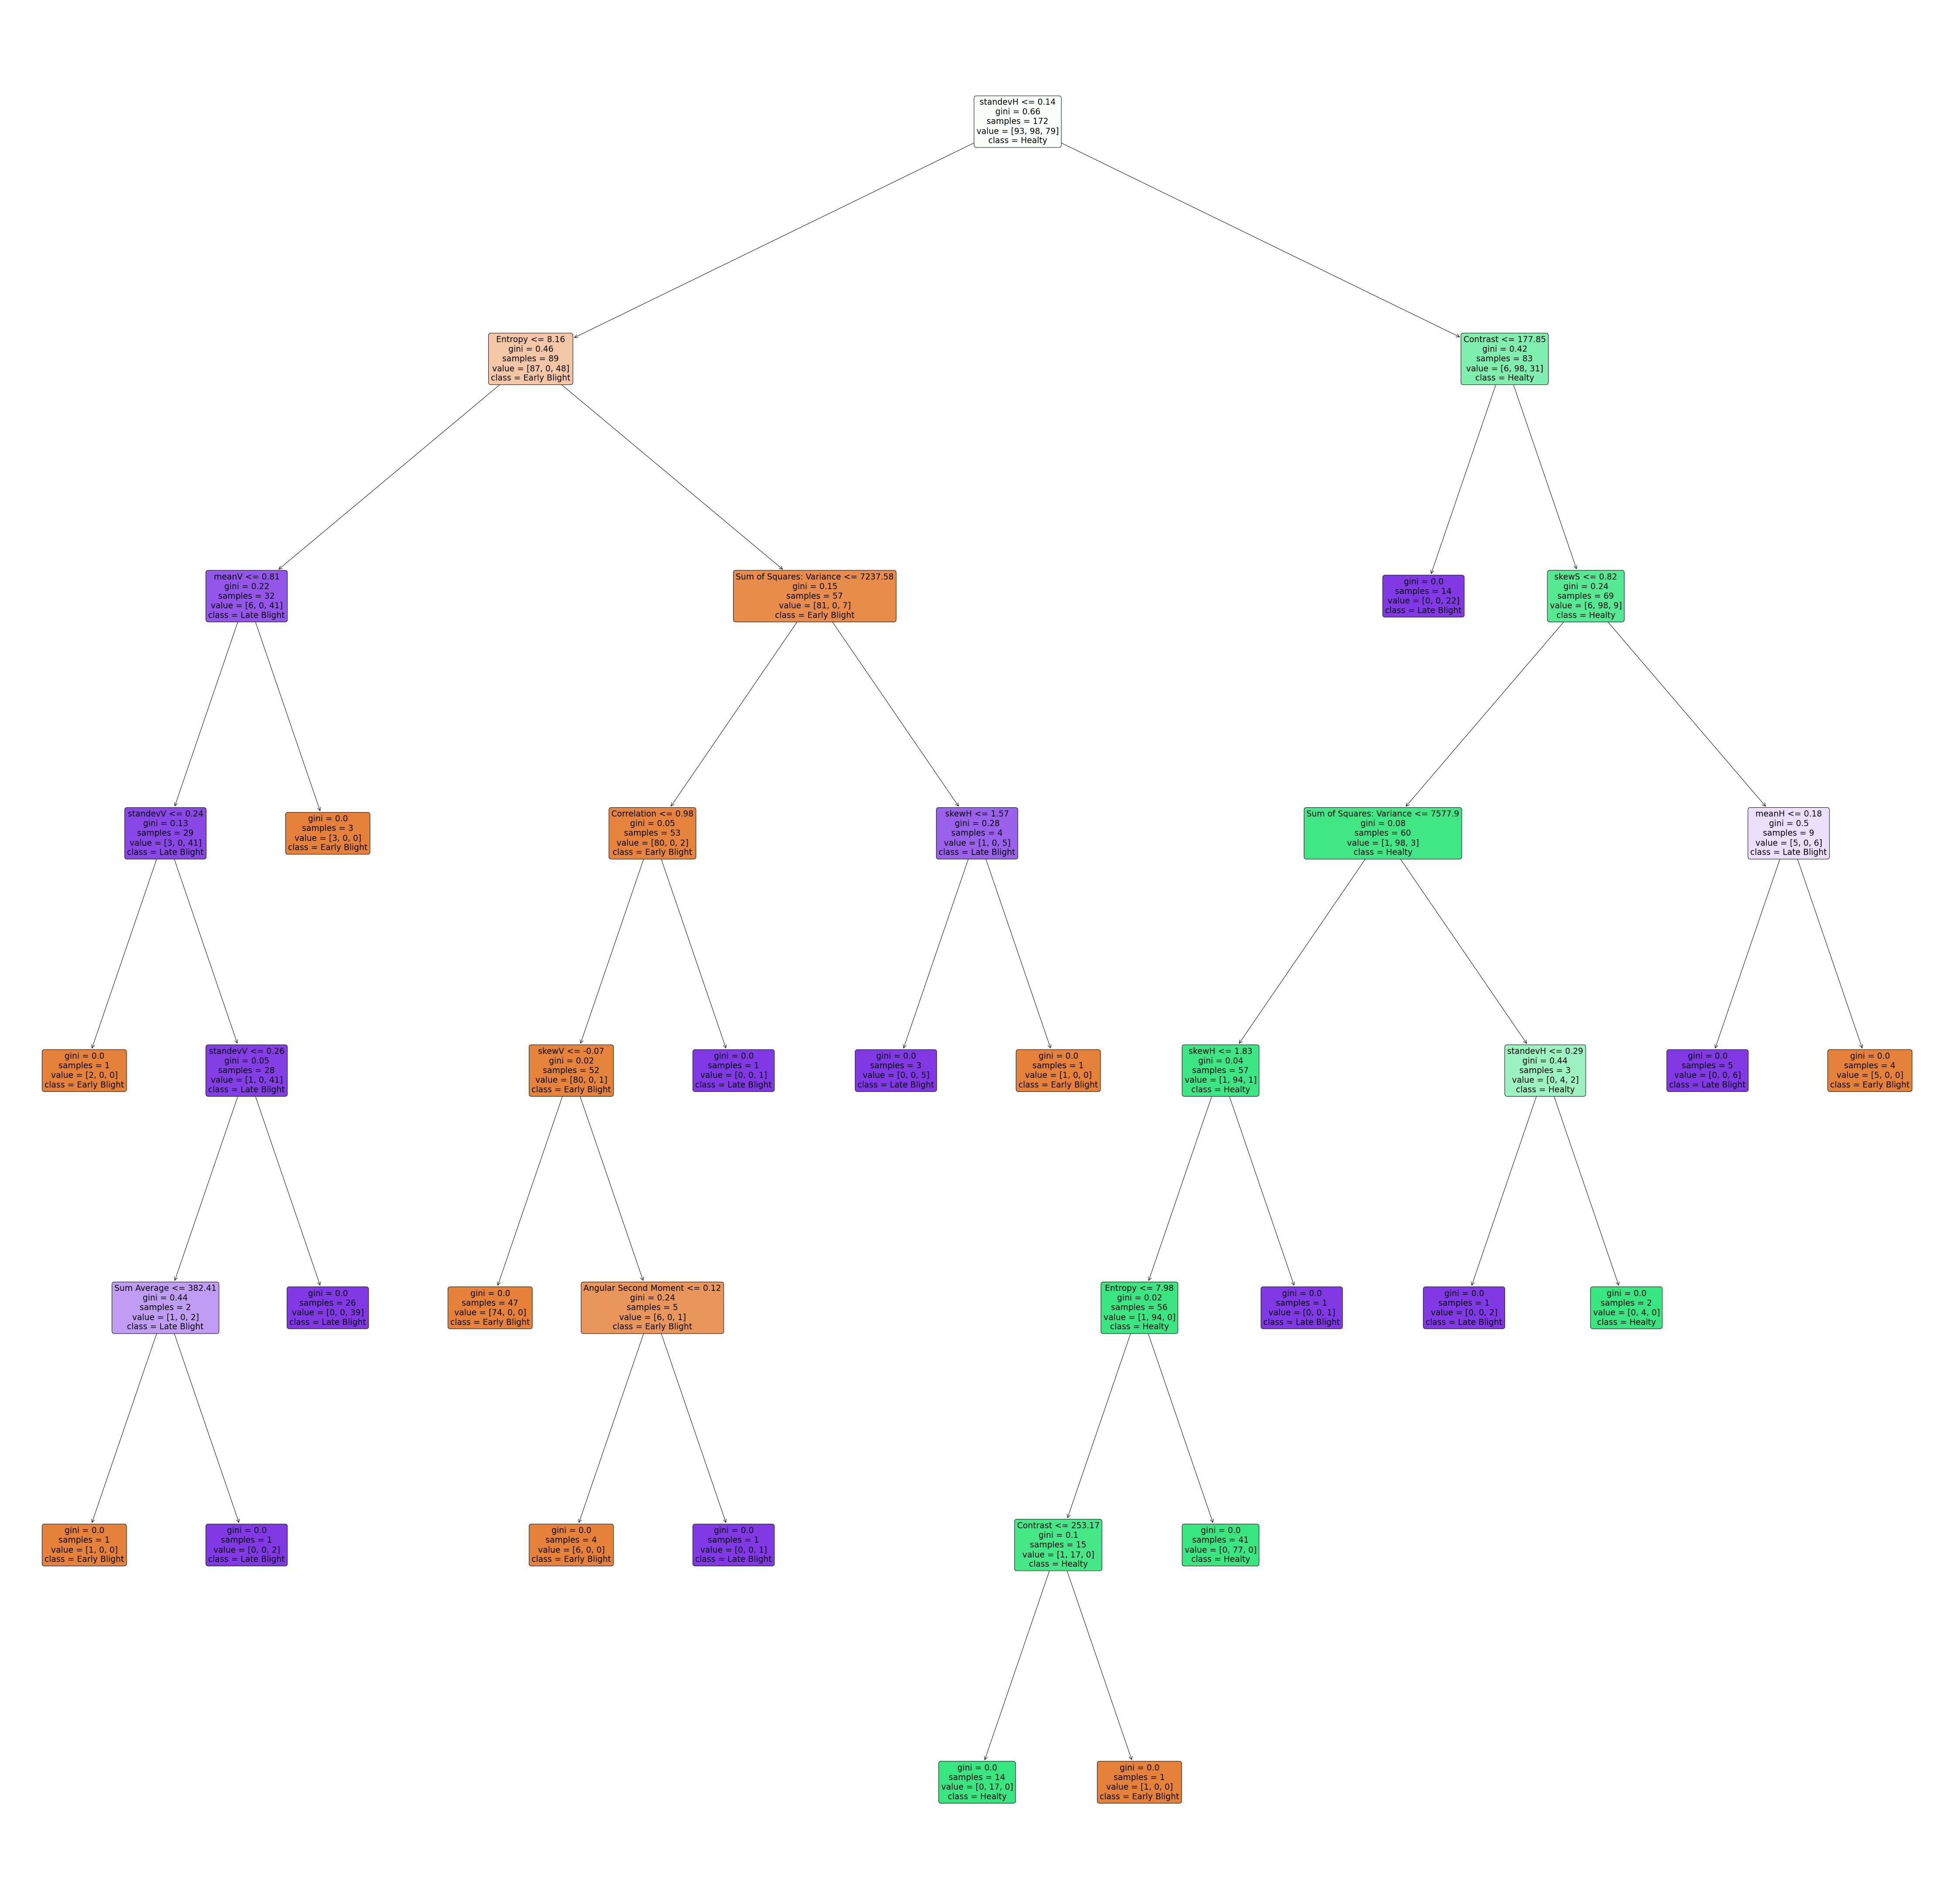

In [ ]:
plt.figure(figsize=(80,80))
tree.plot_tree(rfc.estimators_[4],
                feature_names = feature_cols,
                class_names = ['Early Blight','Healty','Late Blight'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

In [ ]:
d = {'Actual':y_test, 'Prediction':y_pred}
df_pred = pd.DataFrame(d)
df_pred

,Actual,Prediction
229,Late Blight,Late Blight
91,Early Blight,Early Blight
2,Early Blight,Early Blight
236,Late Blight,Late Blight
238,Late Blight,Late Blight
293,Late Blight,Late Blight
90,Early Blight,Early Blight
120,Healty,Healty
168,Healty,Healty
33,Early Blight,Early Blight


In [ ]:
result = confusion_matrix(y_test, y_pred)
acc_result = accuracy_score(y_test, y_pred)
class_result = classification_report(y_test, y_pred)
print("Accuracy: ", acc_result)
print("Confusion Matrix: \n", result)
print(class_result)

Accuracy:  1.0
Confusion Matrix: 
 [[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
              precision    recall  f1-score   support

Early Blight       1.00      1.00      1.00        10
      Healty       1.00      1.00      1.00        10
 Late Blight       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

